In [14]:
import pandas_datareader as pdr
import pandas as pd
import datetime as datetime

In [15]:
df_tesla = pdr.get_data_yahoo('AMZN')
df_tesla

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-07-19,51.579498,51.125000,51.250000,51.343498,59280000.0,51.343498
2017-07-20,51.748501,51.125999,51.579498,51.435001,61950000.0,51.435001
2017-07-21,51.305000,50.549999,51.063999,51.283501,54692000.0,51.283501
2017-07-24,52.150501,51.371498,51.417000,51.947498,65760000.0,51.947498
2017-07-25,52.166500,51.624001,51.902500,51.993500,48952000.0,51.993500
...,...,...,...,...,...,...
2022-07-12,113.230003,108.339996,112.160004,109.220001,54280300.0,109.220001
2022-07-13,111.779999,106.010002,107.029999,110.400002,61353800.0,110.400002
2022-07-14,111.180000,107.580002,110.239998,110.629997,51163100.0,110.629997


<AxesSubplot:xlabel='Date'>

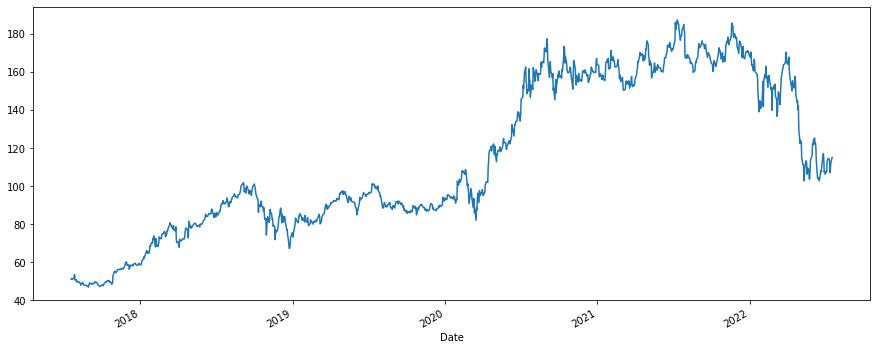

In [16]:
#Simple moving avreage
df_tesla['Open'].plot(figsize=(15,6))

In [17]:
df_tesla['Open: 10 days rolling'] = df_tesla['Open'].rolling(window=10, min_periods=1).mean()
df_tesla['Open: 30 days rolling'] = df_tesla['Open'].rolling(window=30, min_periods=1).mean()
df_tesla['Open: 50 days rolling'] = df_tesla['Open'].rolling(window=50, min_periods=1).mean()

In [18]:
df_tesla

,High,Low,Open,Close,Volume,Adj Close,Open: 10 days rolling,Open: 30 days rolling,Open: 50 days rolling
Date,,,,,,,,,
2017-07-19,51.579498,51.125000,51.250000,51.343498,59280000.0,51.343498,51.250000,51.250000,51.250000
2017-07-20,51.748501,51.125999,51.579498,51.435001,61950000.0,51.435001,51.414749,51.414749,51.414749
2017-07-21,51.305000,50.549999,51.063999,51.283501,54692000.0,51.283501,51.297832,51.297832,51.297832
2017-07-24,52.150501,51.371498,51.417000,51.947498,65760000.0,51.947498,51.327624,51.327624,51.327624
2017-07-25,52.166500,51.624001,51.902500,51.993500,48952000.0,51.993500,51.442599,51.442599,51.442599
...,...,...,...,...,...,...,...,...,...
2022-07-12,113.230003,108.339996,112.160004,109.220001,54280300.0,109.220001,111.078000,112.901000,112.900870
2022-07-13,111.779999,106.010002,107.029999,110.400002,61353800.0,110.400002,110.431000,112.683666,112.444490
2022-07-14,111.180000,107.580002,110.239998,110.629997,51163100.0,110.629997,110.717000,112.482333,112.201270


<AxesSubplot:xlabel='Date'>

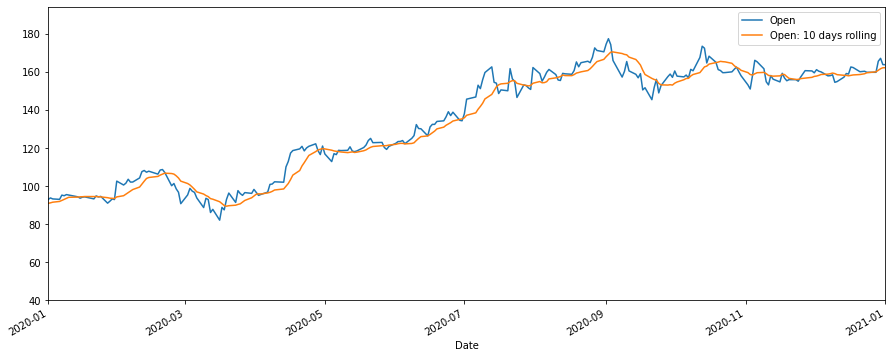

In [19]:
df_tesla[['Open', 'Open: 10 days rolling']].plot(xlim = ['2020-01-01' , '2021-01-01'], figsize=(15,6))

<AxesSubplot:xlabel='Date'>

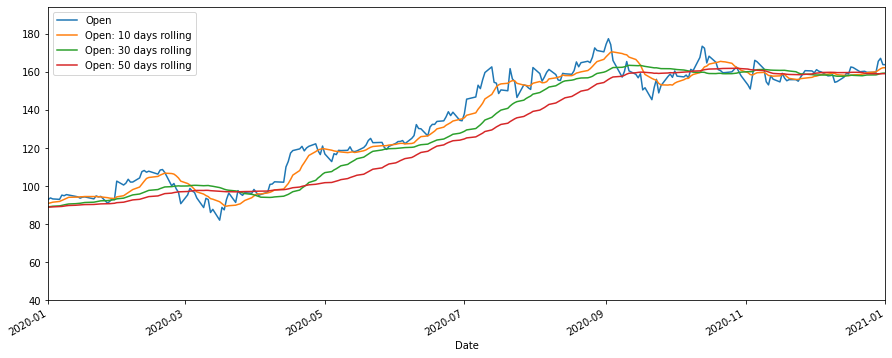

In [20]:
df_tesla[['Open', 'Open: 10 days rolling', 'Open: 30 days rolling','Open: 50 days rolling']].plot(xlim = ['2020-01-01' , '2021-01-01'], figsize=(15,6))

<AxesSubplot:xlabel='Date'>

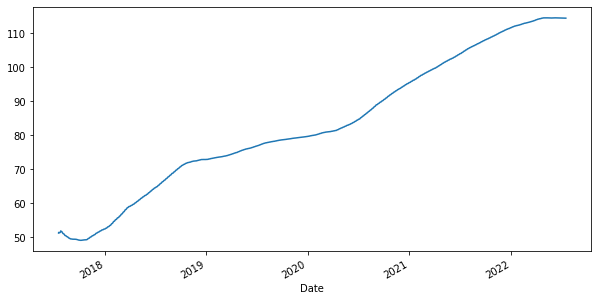

In [21]:
df_tesla['Open'].expanding().mean().plot(figsize=(10,5))  #This is a cumulative moving avreage

In [22]:
#Exponential weighted moving avreage
###CMA  we use this to retrive information from the recent data we receive




In [23]:
#EMWA(T) = a*x(t)+ (1-a)EMWA

df_tesla['EMA_0.1'] = df_tesla['Open'].ewm(alpha=0.1, adjust=False).mean()
df_tesla['EMA_0.3'] = df_tesla['Open'].ewm(alpha=0.3, adjust=False).mean()

C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\plotting\_matplotlib\core.py:571: UserWarning: Attempting to set identical left == right == 18262.0 results in singular transformations; automatically expanding.
  ax.set_xlim(self.xlim)


<AxesSubplot:xlabel='Date'>

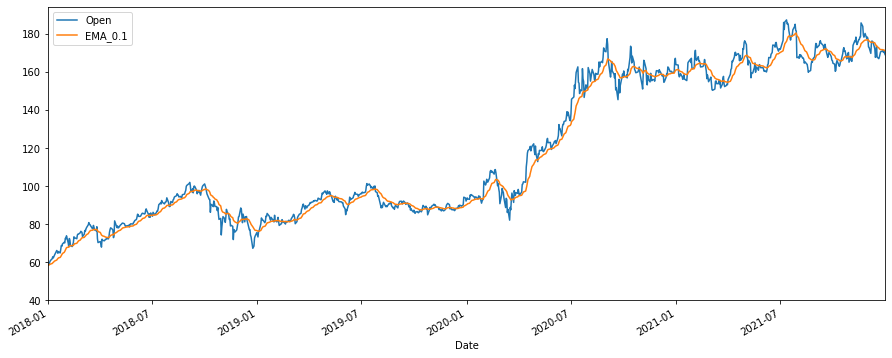

In [24]:
df_tesla[['Open', 'EMA_0.1']].plot(xlim=['2020-01-01', '2020-01-01'] , figsize=(15,6))
#weightage applied to the most recent data demand

C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\plotting\_matplotlib\core.py:571: UserWarning: Attempting to set identical left == right == 18262.0 results in singular transformations; automatically expanding.
  ax.set_xlim(self.xlim)


<AxesSubplot:xlabel='Date'>

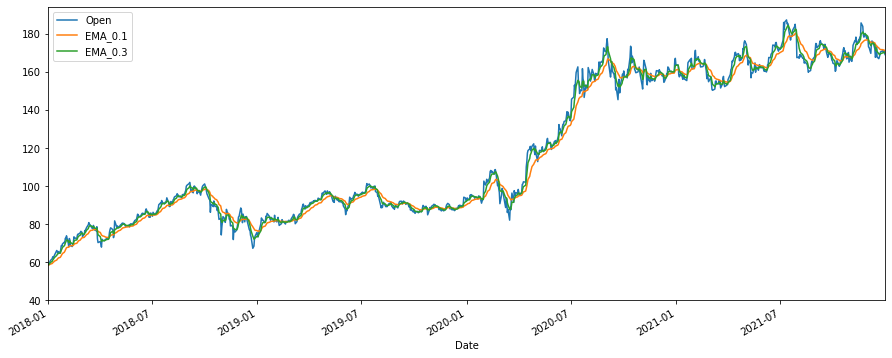

In [25]:
df_tesla[['Open', 'EMA_0.1', 'EMA_0.3']].plot(xlim=['2020-01-01', '2020-01-01'] , figsize=(15,6))

In [26]:
#we see the green color graph , green in more closer to the datapoint(Open) rather than the orange,
#check diffrent value of alpha to get better smoothning